In [514]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib import rc,ticker
from matplotlib.tri import Triangulation
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema,find_peaks

In [2]:
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=30)
font1 = {'family' : 'serif',
        'size'   : 40}
rc('font', **font1)

In [3]:
a0_sizes = [0.416,0.551,0.465,0.475,0.755,0.548,0.505,0.498,0.551]#[0.416,0.551,0.465,0.475,0.755,0.548,0.505,0.498,0.551]#
dt_list = 1e-2#np.mean([9e-3,1e-2,1e-2,6e-3,9e-3,9e-3,1e-2,9e-3])#[6e-3,9e-3,1e-2,1e-2,6e-3,9e-3,9e-3,1e-2,9e-3]#

In [4]:
wound_sizes = ['0.387', '0.46','0.401','0.42','0.383','0.415','0.342','0.485','0.405']#['0.387', '0.46','0.401','0.42','0.383','0.415','0.342','0.485','0.405']#
tissues_list = [1,2,3,4,5,6,7,8,9]#
LW1_list = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25]
#[0.0, 0.2, 0.4, 0.6, 0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.4, 2.8, 3.2, 3.6, 4.0]
L1_list = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25,4.5,4.75,5.0,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.0,7.25]
#[20, 21, 22, 23, 24, 25, 26, 27,28,29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,45,46, 47,48,49,50,51,52,53,54,55]

a1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list),500))
p1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list),500))
t_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
t1_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))
opt_array1 = np.zeros((len(tissues_list),len(L1_list),len(LW1_list)))

for tissue in range(len(tissues_list)):
    p1_list = []
    a1_list = []
    t_list = []
    t1_list = []
    opt_list = []
    for lr in L1_list:
        for lw in LW1_list:
            opt_ = []
            p1 = []
            a1 = []
            with open('tissue225_2/tissue'+str(tissues_list[tissue])+'/woundinfoA'+wound_sizes[tissue]+'G1L-'+str(lr)+'Lw-'+str(lw)+'Ncells225.txt','r') as text:
                for line in text:
                    opt_.append(float(line.replace("\n","").split(' ')[2]))
                    l_line = (line.replace("\n","")).split(' ')
                    p1.append(float(l_line[2]))
                    a1.append(float(l_line[3]))
                    pass
                
                last_line = (line.replace("\n","")).split(' ')
                opt_list.append([lr,lw,np.argmax(opt_)/float(last_line[0])])
                #print(last_line)
                t_list.append([lr,lw,float(last_line[0])*float(wound_sizes[tissue])])
                t1_list.append([lr,lw,float(last_line[1])])
                p1_list.append([lr,lw,p1])
                a1_list.append([lr,lw,a1])
                

    #a1_array = np.array(a1_list)
    #p1_array = np.array(p1_list)
    t_array = np.array(t_list)
    t1_array = np.array(t1_list)
    opt_array = np.array(opt_list)

    
    for i in range(500):
        for j in range(len(a1_list)): 

            a1_array1[tissue,j//len(LW1_list),j%len(LW1_list),i] = (a1_list[j][2][min(i,len(a1_list[j][2])-1)])
        
    
    for i in range(500):
        for j in range(len(p1_list)):
            
            p1_array1[tissue,j//len(LW1_list),j%len(LW1_list),i] = (p1_list[j][2][min(i,len(p1_list[j][2])-1)])
    
    for i in range(t_array.shape[0]):
        t_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (t_array[i,2])
        
    for i in range(t1_array.shape[0]):
        t1_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (t1_array[i,2])
        
    for i in range(opt_array.shape[0]):
        opt_array1[tissue,i//len(LW1_list),i%len(LW1_list)] = (opt_array[i,2])
        


In [5]:
dt_list

0.01

In [6]:
beta1=np.zeros((len(tissues_list),len(L1_list)))
lambda1 = np.zeros((len(tissues_list),len(LW1_list)))

beta1_lin = np.array(L1_list) 
lambda1_lin = np.array(LW1_list)


for w in range(len(tissues_list)):
    beta1[w] = beta1_lin/(float(a0_sizes[w])*2)
    
for w in range(len(tissues_list)):
    lambda1[w] = lambda1_lin/(float(a0_sizes[w])**(3/2))
    
beta2 = beta1_lin/(np.mean([float(a0) for a0 in a0_sizes])*2)
lambda2 = lambda1_lin/(np.mean([float(a0) for a0 in a0_sizes])**(3/2))

In [7]:
avg_p1 = np.zeros((len(L1_list),len(LW1_list),500))
std_p1 = np.zeros((len(L1_list),len(LW1_list),500)); avg_t = 0*t_array1[0]
w_list = [float(w) for w in wound_sizes]
for i in range(len(L1_list)):
    for j in range(len(LW1_list)):
        avg_t[i,j] = int(np.mean(t_array1[:,i,j]/(w_list[:len(tissues_list)])))
        p_norm = 0*p1_array1
        for l in range(len(tissues_list)):
            p_norm[l,i,j] = p1_array1[l,i,j]/p1_array1[l,i,j,0]
        avg_p1[i,j] = np.mean(p_norm[:,i,j],0); std_p1[i,j] = np.std(p_norm[:,i,j],0)

In [255]:
i

29

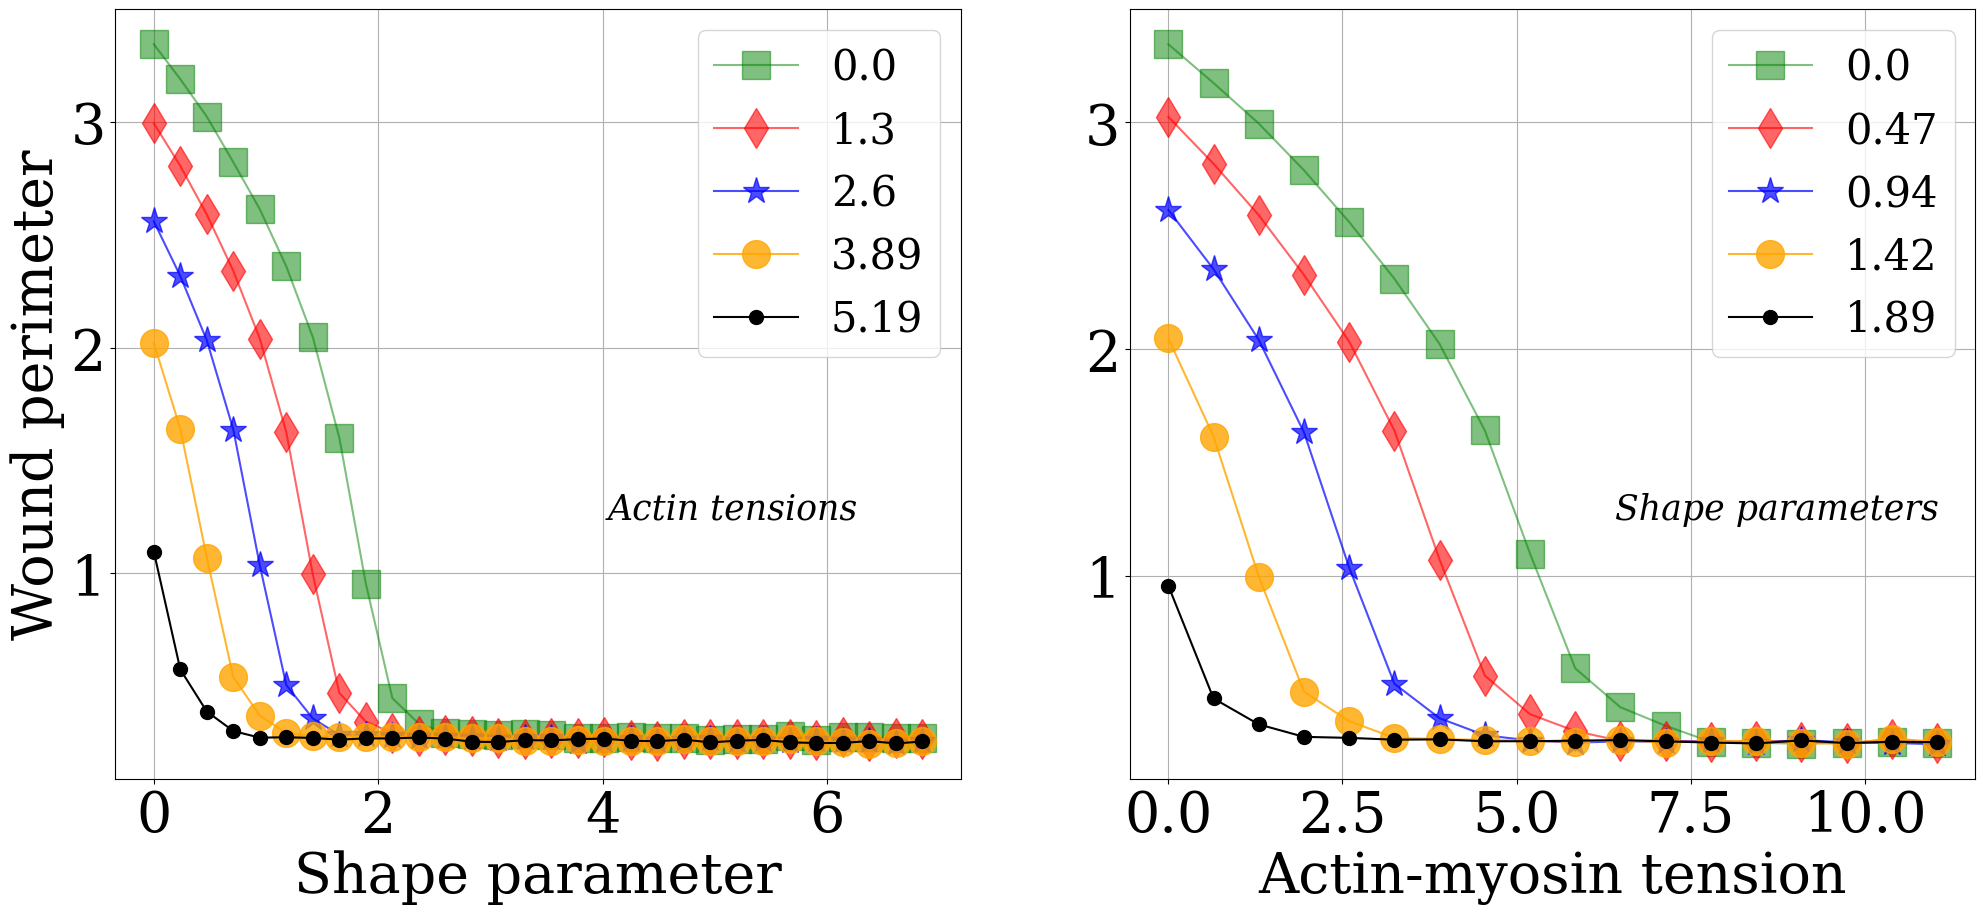

In [8]:
plt.figure(figsize=(24,10))
plt.subplot(121)
plt.plot(beta2[:],(avg_p1[:,0,200]),'gs-',alpha=0.5, ms = 20,label=lambda2[0].round(2),mfc = 'g')
#plt.fill_between(beta2,avg_p1[:,0,200]-0.5*std_p1[:,0,200],avg_p1[:,0,200]+0.5*std_p1[:,0,200],color = 'green',alpha=0.3)
plt.plot(beta2[:],(avg_p1[:,2,200]),'rd-',alpha=0.6, ms = 20,label=lambda2[2].round(2),mfc = 'r')
#plt.fill_between(beta2,avg_p1[:,2,200]-0.5*std_p1[:,2,200],avg_p1[:,2,200]+0.5*std_p1[:,2,200],color = 'green',alpha=0.3)
plt.plot(beta2[:],(avg_p1[:,4,200]),'b*-',alpha=0.7, ms = 20,label=lambda2[4].round(2),mfc = 'b')
#plt.fill_between(beta2,avg_p1[:,4,200]-0.5*std_p1[:,4,200],avg_p1[:,4,200]+0.5*std_p1[:,4,200],color = 'green',alpha=0.3)
plt.plot(beta2[:],(avg_p1[:,6,200]),'o-',color='orange',alpha=0.8, ms = 20,label=lambda2[6].round(2),mfc = 'orange')
plt.plot(beta2[:],(avg_p1[:,8,200]),'k.-',alpha=1, ms = 20,label=lambda2[8].round(2))
plt.xlabel("Shape parameter")
plt.ylabel("Wound perimeter")
plt.grid(which = 'both')
plt.legend(prop=font,loc = "best")
plt.subplot(122)
plt.plot(lambda2[:],(avg_p1[0,:,200]),'gs-',alpha=0.5, ms = 20,label=beta2[0].round(2),mfc = 'g')
#plt.fill_between(beta2,avg_p1[:,0,200]-0.5*std_p1[:,0,200],avg_p1[:,0,200]+0.5*std_p1[:,0,200],color = 'green',alpha=0.3)
plt.plot(lambda2[:],(avg_p1[2,:,200]),'rd-',alpha=0.6, ms = 20,label=beta2[2].round(2),mfc = 'r')
#plt.fill_between(beta2,avg_p1[:,2,200]-0.5*std_p1[:,2,200],avg_p1[:,2,200]+0.5*std_p1[:,2,200],color = 'green',alpha=0.3)
plt.plot(lambda2[:],(avg_p1[4,:,200]),'b*-',alpha=0.7, ms = 20,label=beta2[4].round(2),mfc = 'b')
#plt.fill_between(beta2,avg_p1[:,4,200]-0.5*std_p1[:,4,200],avg_p1[:,4,200]+0.5*std_p1[:,4,200],color = 'green',alpha=0.3)
plt.plot(lambda2[:],(avg_p1[6,:,200]),'o-',color='orange',alpha=0.8, ms = 20,label=beta2[6].round(2),mfc = 'orange')
plt.plot(lambda2[:],(avg_p1[8,:,200]),'k.-',alpha=1, ms = 20,label=beta2[8].round(2))
plt.xlabel("Actin-myosin tension")
plt.grid(which = 'both')
plt.legend(prop=font,loc = "best")
plt.figtext(0.33,0.37,"Actin tensions",fontfamily="serif", fontsize = 25,fontstyle = "italic",color = "black")
plt.figtext(0.75,0.37,"Shape parameters",fontstyle = "italic", fontsize = 25,color = "black")
plt.savefig("PerimeterBifurcationPython.pdf", dpi = 600,bbox_inches='tight')

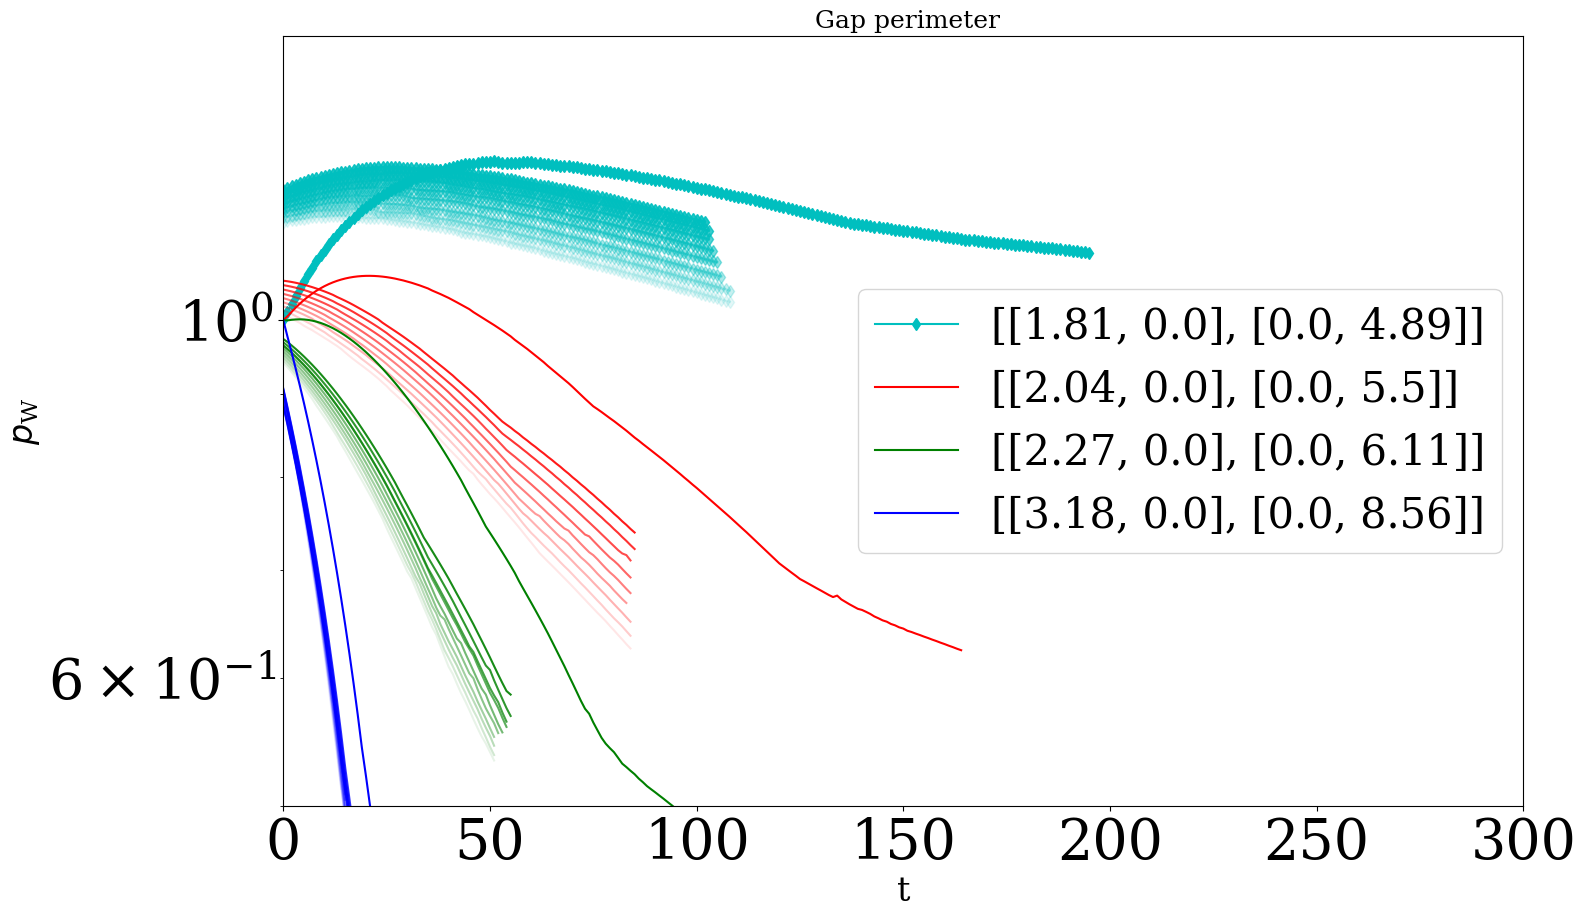

In [9]:
plt.figure(figsize=(16,10))

P = 9
for k  in range(0,P):
    if k == 0: 
        plt.plot(avg_p1[k,P-(k+1),:int(avg_t[k,P-(k+1)])],'c-d',alpha=(1-k/P),label=[[beta1[1,P-(k+1)].round(2),lambda1[1,k].round(2)],[beta1[1,k].round(2),lambda1[1,P-(k+1)].round(2)]])
    if k != 0:
        plt.plot(avg_p1[k,P-(k+1),int(avg_t[k,P-(k+1)]/7):int(2*avg_t[k,P-(k+1)]/3)],'c-d',alpha=(1-k/P))

P = 10
for k  in range(0,P):
    if k == 0: 
        plt.plot(avg_p1[k,P-(k+1),:int(avg_t[k,P-(k+1)])],'r-',alpha=(1-k/P),label=[[beta1[1,P-(k+1)].round(2),lambda1[1,k].round(2)],[beta1[1,k].round(2),lambda1[1,P-(k+1)].round(2)]])
    if k != 0:
        plt.plot(avg_p1[k,P-(k+1),int(avg_t[k,P-(k+1)]/7):int(2*avg_t[k,P-(k+1)]/3)],'r-',alpha=(1-k/P))
    
P = 11
for k  in range(0,P):
    if k == 0: 
        plt.plot(avg_p1[k,P-(k+1),:int(avg_t[k,P-(k+1)])],'g-',alpha=(1-k/P),label=[[beta1[1,P-(k+1)].round(2),lambda1[1,k].round(2)],[beta1[1,k].round(2),lambda1[1,P-(k+1)].round(2)]])
    if k != 0:
        plt.plot(avg_p1[k,P-(k+1),int(avg_t[k,P-(k+1)]/7):int(2*avg_t[k,P-(k+1)]/3)],'g-',alpha=(1-k/P))
    
P = 15
for k  in range(0,P):
    if k == 0: 
        plt.plot(avg_p1[k,P-(k+1),:int(avg_t[k,P-(k+1)])],'b-',alpha=(1-k/P),label=[[beta1[1,P-(k+1)].round(2),lambda1[1,k].round(2)],[beta1[1,k].round(2),lambda1[1,P-(k+1)].round(2)]])
    if k != 0:
        plt.plot(avg_p1[k,P-(k+1),int(avg_t[k,P-(k+1)]/7):int(2*avg_t[k,P-(k+1)]/3)],'b-',alpha=(1-k/P))


#plt.xscale('symlog')
plt.yscale('log')
plt.ylim(0.5,1.5)
plt.xlim(0,300)

plt.title(" Gap perimeter",fontsize = 18,fontfamily= 'serif')
plt.xlabel("$\mathregular{t}$",fontsize = 24,fontdict= {'family':'serif'})
plt.ylabel("$p_\mathregular{W}$",fontsize = 24,fontdict= {'family':'serif'})

plt.legend(fontsize=13,prop=font,loc = "best")

In [227]:
t_scale = np.zeros((len(LW1_list),len(L1_list)))
c_scale = np.zeros((len(LW1_list),len(L1_list)))
for i in range(len(L1_list)):
    for j in range(len(LW1_list)):
        lij = int(avg_t[i,j])
        x_normalized = (avg_p1[i,j,:int(2*lij/3)-1]-np.min(avg_p1[i,j,:int(2*lij/3)-1]))/(np.max(avg_p1[i,j,:int(2*lij/3)-1])-np.min(avg_p1[i,j,:int(2*lij/3)-1]))
        y = np.log(np.abs(np.diff(x_normalized))+10**(-16))
        x = (np.arange(lij)*dt_list)[:int(2*lij/3)][:-2]
        reg4 = LinearRegression().fit(x.reshape(-1, 1),y)
        t_scale[j,i] = (reg4.coef_)[0].round(5)
        c_scale[j,i] = (reg4.intercept_).round(5)

Text(0.5, 1.0, '$<\\log|\\dot{p_W}|/t>$')

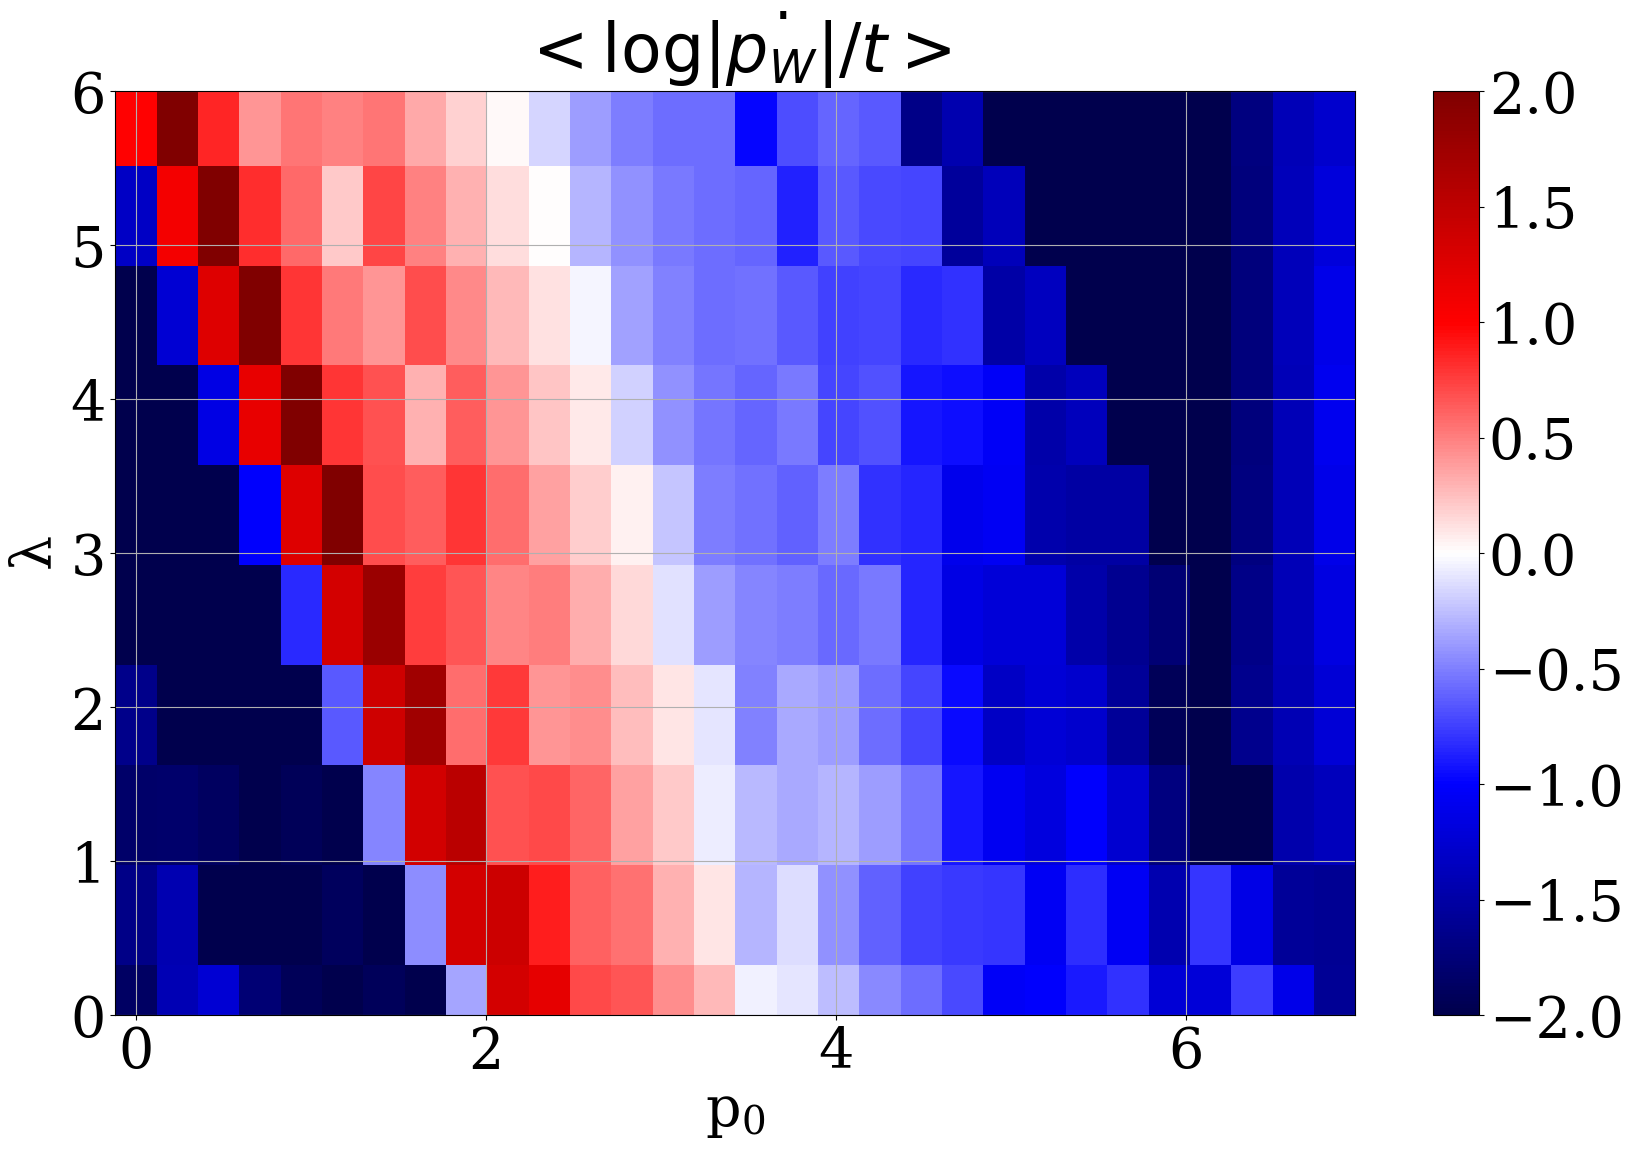

In [11]:
plt.figure(figsize=(20,12))
plt.pcolormesh(beta2[:],lambda2[:],t_scale,cmap="seismic")
# plt.plot(p_v,lc,'g--',lw=7.5,label='Fit (1)')
# plt.plot(0*beta2+pt, beta2,'k--',lw=7.5,label='Fit (Transition)')
plt.ylim(0,6)
plt.colorbar()
plt.clim(-2,2)
plt.grid(which='both')
plt.xlabel("$\mathregular{p_0}$",fontdict= {'family':'serif'})
plt.ylabel("$\mathregular{\lambda}$",fontdict= {'family':'serif'})
# plt.legend(prop=font1,loc = "best")
plt.title("$<\log|\dot{p_W}|/t>$")
# plt.savefig("PerimeterChangeTransition1.pdf", dpi = 600,bbox_inches='tight')

Text(0.5, 1.0, '$\\mathregular{\\beta_1}$')

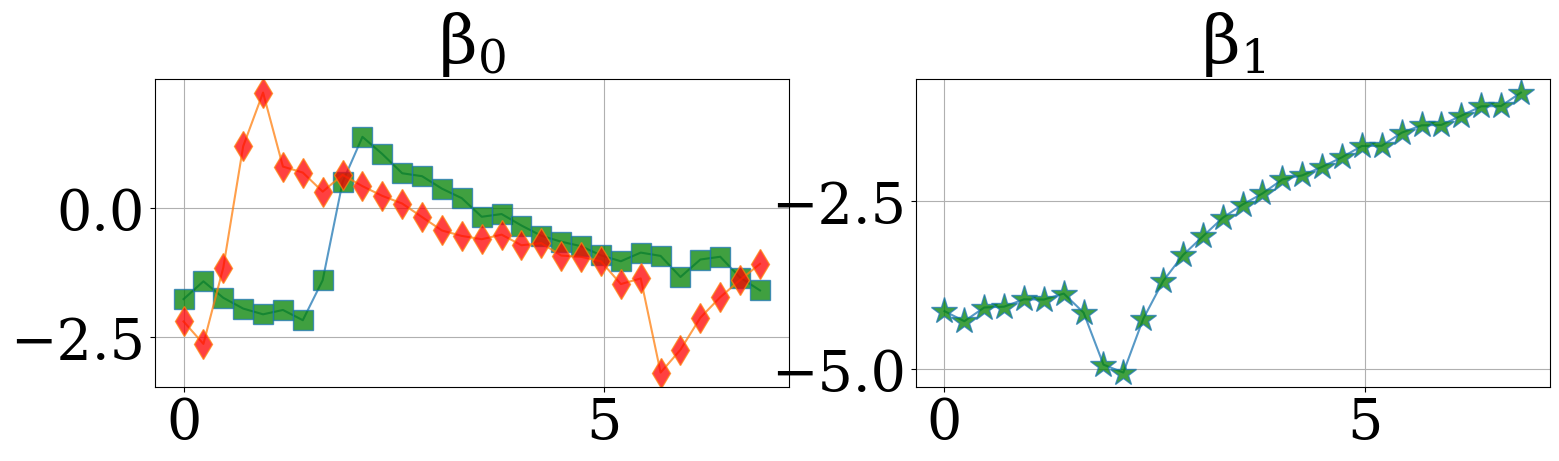

In [12]:
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.plot(beta2,np.mean(t_scale[0:2,:],axis=0),'s-',ms=15,mfc = 'g',alpha=0.75)
plt.plot(beta2,np.mean(t_scale[6:7,:],axis=0),'d-',ms=15,mfc = 'r',alpha=0.75)
plt.title("$\mathregular{\\beta_0}$")
#plt.plot(beta2,t_scale[5,:],'o-',ms=20)
plt.grid(which='both')
#plt.plot(beta2,c_scale[0,:])
plt.subplot(122)
plt.plot(beta2,np.mean(c_scale[0:2],axis=0),'*-',ms=20,mfc = 'g',alpha=0.75)
#plt.xlim(0,10)
#plt.plot(lambda2,t_scale[:,1],'*-',ms=20)
plt.grid(which='both')
plt.title("$\mathregular{\\beta_1}$")
#plt.plot(lambda2,c_scale[:,0])



In [298]:
t0_scale = np.zeros((len(LW1_list),len(L1_list)))
c0_scale = np.zeros((len(LW1_list),len(L1_list)))
for i in range(len(L1_list)):
    for j in range(len(LW1_list)):
        lij = int(avg_t[i,j])
        x_normalized = (avg_p1[i,j,int(1*lij/10):int(2*lij/3)+1]-np.min(avg_p1[i,j,int(1*lij/10):int(2*lij/3)+1]))/(np.max(avg_p1[i,j,int(1*lij/10):int(2*lij/3)+1])-np.min(avg_p1[i,j,int(1*lij/10):int(2*lij/3)+1]))
        y = x_normalized[1:]
        x = x_normalized[:-1]
        reg4 = LinearRegression(fit_intercept = False).fit(x.reshape(-1, 1),y)
        t0_scale[j,i] = (((reg4.coef_-1)))[0].round(5)
        # c0_scale[j,i] = (reg4.intercept_).round(5)

Text(0.5, 1.0, '$<\\log|\\dot{p_W}|/t>$')

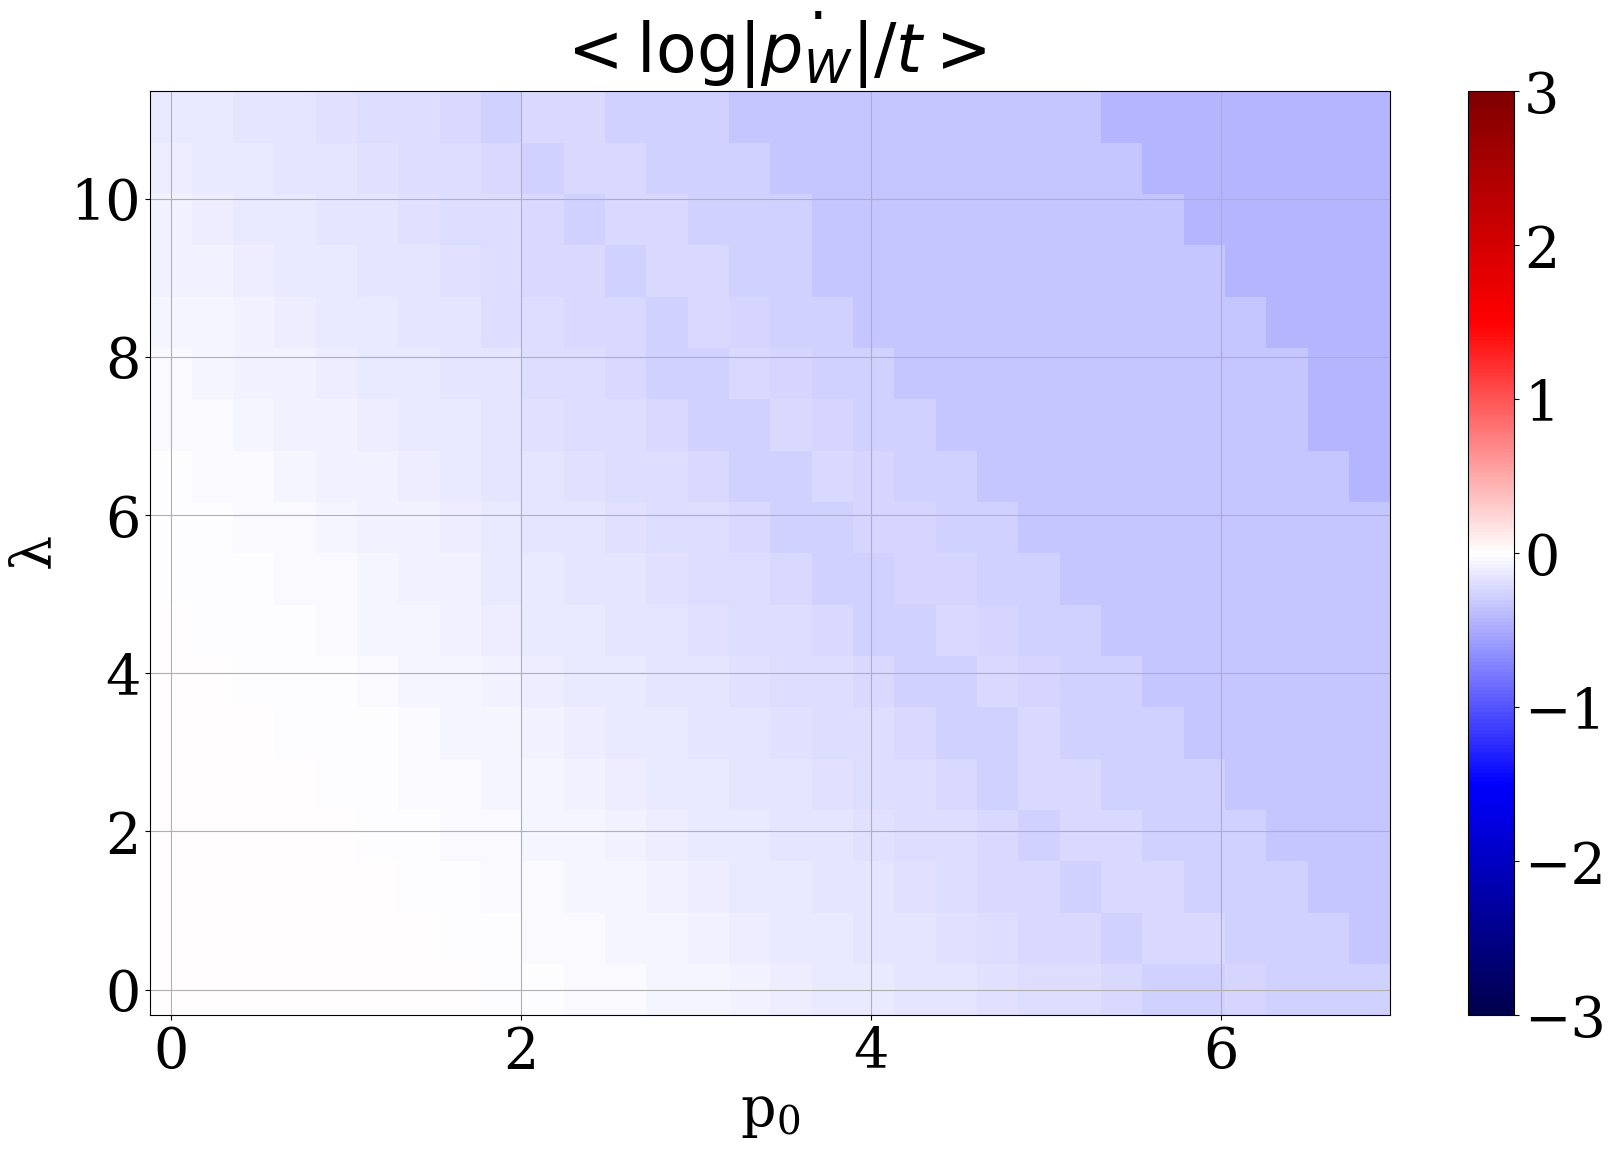

In [344]:
plt.figure(figsize=(20,12))
plt.pcolormesh(beta2[:],lambda2[:],t0_scale,cmap="seismic")
# plt.plot(p_v,lc,'g--',lw=7.5,label='Fit (1)')
# plt.plot(0*p_v+pt, p_v,'k--',lw=7.5,label='Fit (Transition)')
# plt.ylim(0,6)
plt.colorbar()
plt.clim(-3,3)
plt.grid(which='both')
plt.xlabel("$\mathregular{p_0}$",fontdict= {'family':'serif'})
plt.ylabel("$\mathregular{\lambda}$",fontdict= {'family':'serif'})
# plt.legend(prop=font1,loc = "best")
plt.title("$<\log|\dot{p_W}|/t>$")
# plt.savefig("PerimeterChangeTransition1.pdf", dpi = 600,bbox_inches='tight')

In [366]:
def corrfunc(x,y,T):
    f = np.zeros(T)
    for i in range(T):
        xf = len(x)-i
        f[i] = np.corrcoef(x[0:xf]*y[i:])
    return f

In [445]:
cormat = np.zeros((len(beta2),len(lambda2),250))
for i in range(len(lambda2)):
    for j in range(len(beta2)):
        cormat[j,i] = np.correlate(avg_p1[j,i],avg_p1[j,i],'full')[499:][:250]/np.correlate(avg_p1[j,i],avg_p1[j,i],'valid')



Text(0, 0.5, '$\\mathregular{\\lambda}$')

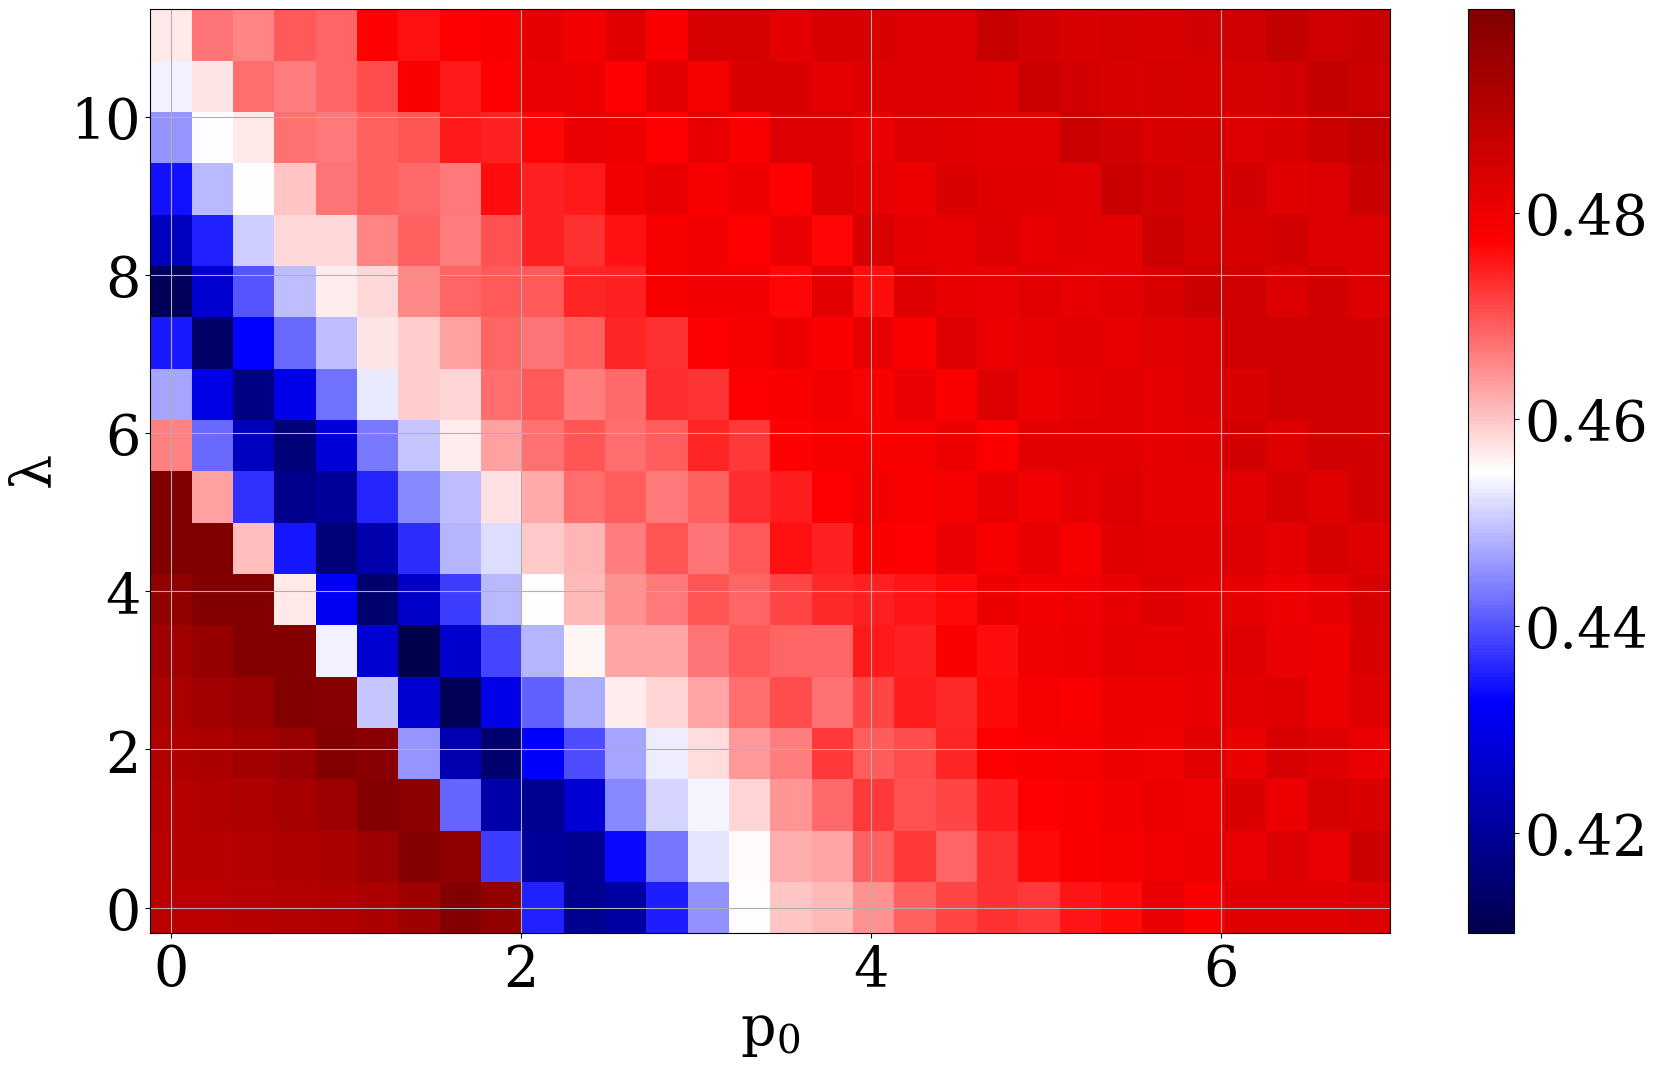

In [446]:
plt.figure(figsize=(20,12))
plt.pcolormesh(beta2[:],lambda2[:],(cormat[:,:,-1].T),cmap="seismic")
# plt.plot(p_v,lc,'g--',lw=7.5,label='Fit (1)')
# plt.plot(0*p_v+pt, p_v,'k--',lw=7.5,label='Fit (Transition)')
# plt.ylim(0,6)
plt.colorbar()
#plt.clim(0,3)
plt.grid(which='both')
plt.xlabel("$\mathregular{p_0}$",fontdict= {'family':'serif'})
plt.ylabel("$\mathregular{\lambda}$",fontdict= {'family':'serif'})
# plt.legend(prop=font1,loc = "best")
#plt.title("$<\log|\dot{p_W}|/t>$")
# plt.savefig("PerimeterChangeTransition1.pdf", dpi = 600,bbox_inches='tight')

Text(0.5, 1.0, '$\\mathregular{\\beta_1}$')

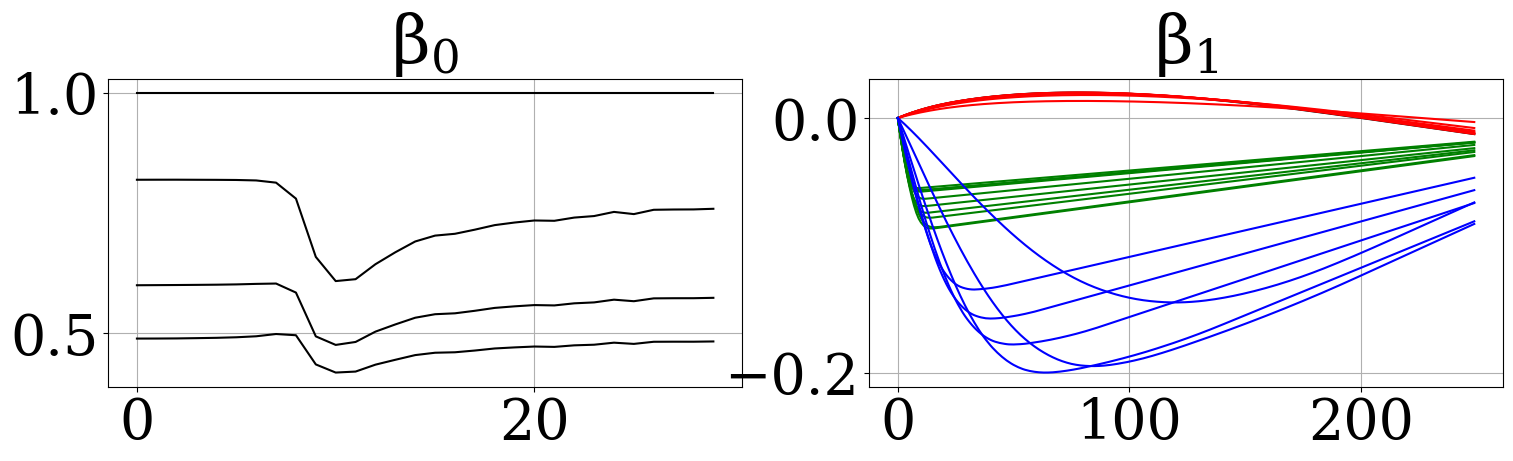

In [491]:
plt.figure(figsize=(18,4))
p = np.arange(0,8)
plt.subplot(121)

plt.plot(cormat[:,0,0],'k')
plt.plot(cormat[:,0,100],'k')
plt.plot(cormat[:,0,200],'k')
plt.plot(cormat[:,0,-1],'k')

# plt.plot(beta2,t_scale[p,:].T,'gs-',ms=10,mfc = 'g',alpha=0.2)
# plt.plot(beta2,t0_scale[p,:].T,'rd-',ms=10,mfc = 'r',alpha=0.2)
# plt.plot(0*beta2+3.6,7*(beta2/7.5-0.5),'k-',lw=5,alpha=1)
plt.title("$\mathregular{\\beta_0}$")
#plt.plot(beta2,t_scale[5,:],'o-',ms=20)
plt.grid(which='both')
#plt.plot(beta2,c_scale[0,:])
plt.subplot(122)
lin = 1-(0.5)*np.arange(0,250)/250
plt.plot(cormat[0,0]-lin,'k')
plt.plot((cormat[1:8,0]-lin).T,'r')
plt.plot((cormat[20:,0]-lin).T,'g')
plt.plot((cormat[9:15,0]-lin).T,'b')
#plt.xlim(0,10)
#plt.plot(lambda2,t_scale[:,1],'*-',ms=20)
plt.grid(which='both')
plt.title("$\mathregular{\\beta_1}$")
#plt.plot(lambda2,c_scale[:,0])

In [522]:

cormatt = np.zeros((len(beta2),len(lambda2)))
for i in range(len(lambda2)):
    for j in range(len(beta2)):
        cormatt[j,i] = find_peaks(np.abs(cormat[j,i]-lin))[0][0]

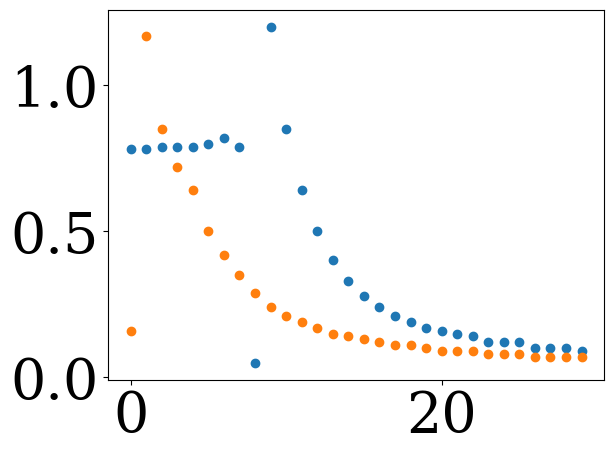

In [528]:
plt.plot(cormatt[:,0]*dt_list,'o')
plt.plot(cormatt[:,8]*dt_list,'o')


Text(0.5, 1.0, '$\\mathregular{\\beta_1}$')

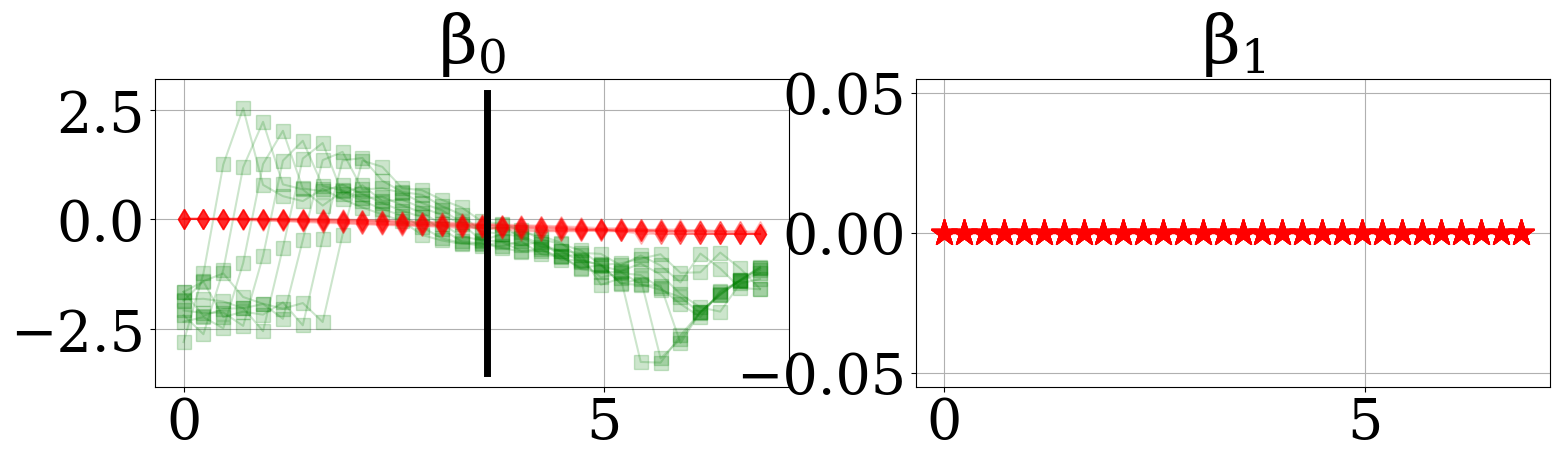

In [300]:
plt.figure(figsize=(18,4))
p = np.arange(0,8)
plt.subplot(121)
plt.plot(beta2,t_scale[p,:].T,'gs-',ms=10,mfc = 'g',alpha=0.2)
plt.plot(beta2,t0_scale[p,:].T,'rd-',ms=10,mfc = 'r',alpha=0.2)
plt.plot(0*beta2+3.6,7*(beta2/7.5-0.5),'k-',lw=5,alpha=1)
plt.title("$\mathregular{\\beta_0}$")
#plt.plot(beta2,t_scale[5,:],'o-',ms=20)
plt.grid(which='both')
#plt.plot(beta2,c_scale[0,:])
plt.subplot(122)
# plt.plot(beta2,c_scale[p].T,'g*-',ms=20,mfc = 'g',alpha=0.75)
plt.plot(beta2,c0_scale[p].T,'r*-',ms=20,mfc = 'r',alpha=0.75)
#plt.xlim(0,10)
#plt.plot(lambda2,t_scale[:,1],'*-',ms=20)
plt.grid(which='both')
plt.title("$\mathregular{\\beta_1}$")
#plt.plot(lambda2,c_scale[:,0])



In [303]:
P = np.arange(9,15)
p = 8
mean_ts = np.zeros((p,30))


for k  in range(0,p):
    avg_ts = list(t0_scale[k,:30-k])
    
    
    for i in range(k):
        avg_ts.insert(0,avg_ts[0])

    mean_ts[k] = np.array(avg_ts)

Text(0.5, 1.0, 'Eigenvalue')

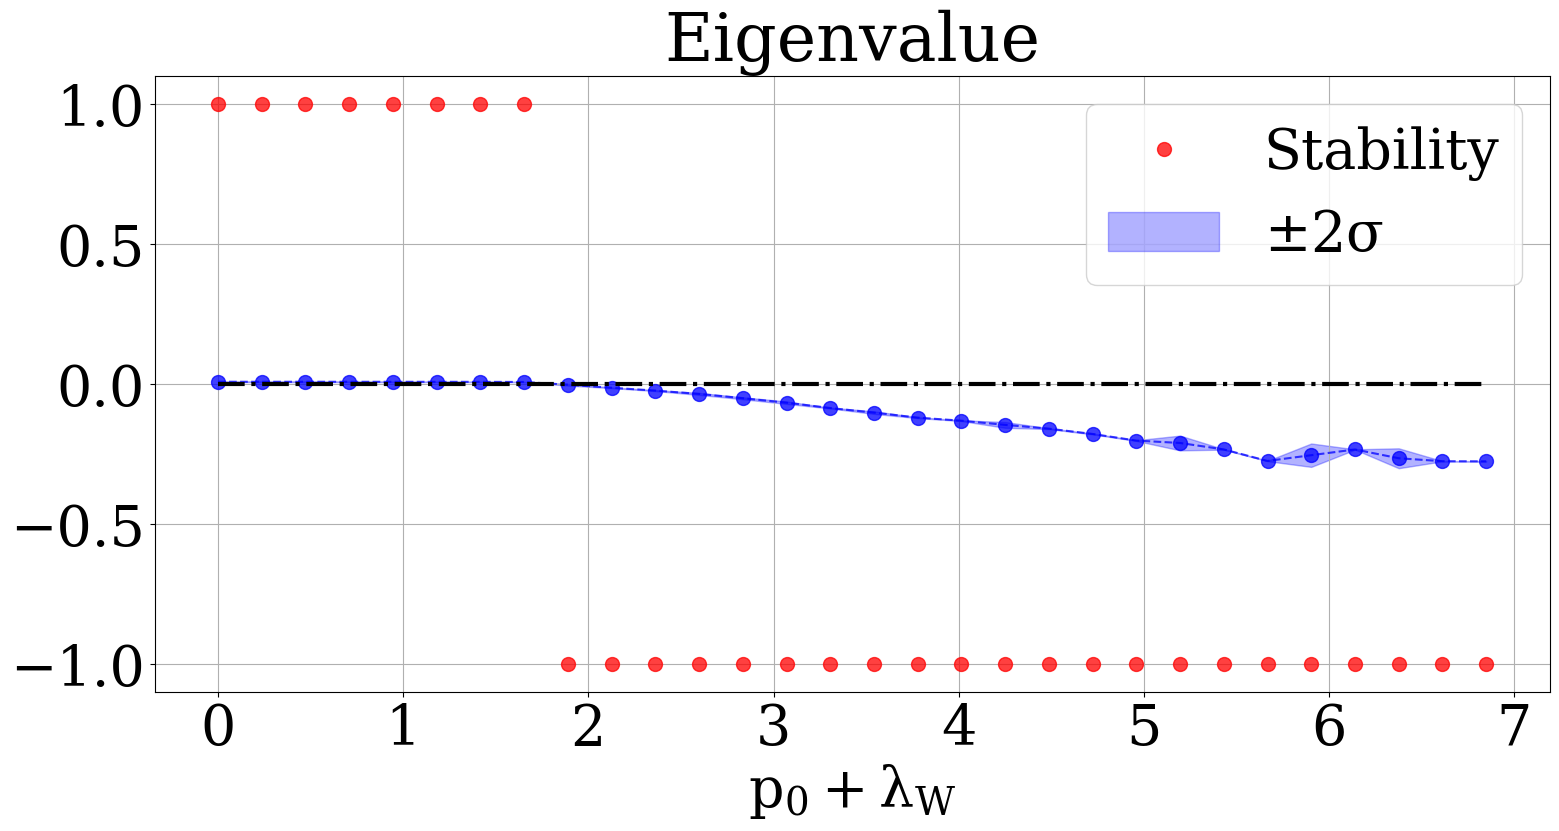

In [304]:
plt.figure(figsize=(18,8))
plt.plot(beta2,np.mean(mean_ts,0),'bo--',ms=10,mfc = 'b',alpha=0.75)
unsteig = np.array(np.mean(mean_ts,0)>0,int)
steig = np.array(np.mean(mean_ts,0)<0,int)
plt.plot(beta2,unsteig-steig,'ro',ms=10,alpha=0.75,label='Stability')
plt.plot(beta2,beta2*0,'k-.',lw=3)
plt.fill_between(beta2,np.mean(mean_ts,0)-2*np.std(mean_ts,0),np.mean(mean_ts,0)+2*np.std(mean_ts,0),color = 'blue',alpha=0.3,label = "$\pm \mathregular{2\sigma}$")
plt.grid(which='both')
plt.xlabel("$\mathregular{p_0+\lambda_W}$",fontdict= {'family':'serif'})
plt.legend(prop=font1,loc = "best")
plt.title('Eigenvalue')
#plt.ylim(-4,2)

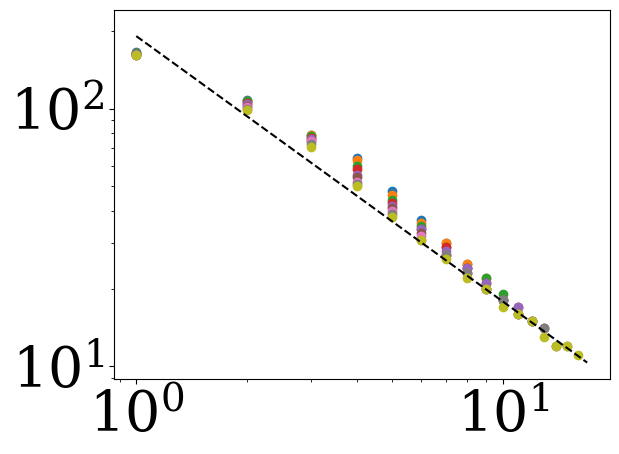

In [9]:
plt.plot(avg_t[0,8:-1],'o')
plt.plot(avg_t[1,7:-1],'o')
plt.plot(avg_t[2,6:-1],'o')
plt.plot(avg_t[3,5:-1],'o')
plt.plot(avg_t[4,4:-1],'o')
plt.plot(avg_t[5,3:-1],'o')
plt.plot(avg_t[6,2:-1],'o')
plt.plot(avg_t[7,1:-1],'o')
plt.plot(avg_t[8,0:-1],'o')
plt.plot(np.arange(1,18),191*np.arange(1,18)**(-1.03),'k--')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(7,18)

In [74]:
avg_t*0.0025

array([[0.52  , 0.5275, 0.5275, 0.5275, 0.5275, 0.5275, 0.5275, 0.5275,
        0.49  , 0.4125, 0.27  , 0.1975, 0.16  , 0.12  , 0.0925, 0.075 ,
        0.0625, 0.055 ],
       [0.5275, 0.5275, 0.5275, 0.5275, 0.5275, 0.5275, 0.5275, 0.4925,
        0.41  , 0.2675, 0.1975, 0.1575, 0.115 , 0.09  , 0.075 , 0.0625,
        0.055 , 0.0475],
       [0.5275, 0.5275, 0.5275, 0.5275, 0.5275, 0.5275, 0.495 , 0.41  ,
        0.2675, 0.195 , 0.15  , 0.11  , 0.0875, 0.0725, 0.06  , 0.055 ,
        0.0475, 0.0425],
       [0.5275, 0.5275, 0.5275, 0.5275, 0.5275, 0.4975, 0.4075, 0.2625,
        0.1925, 0.145 , 0.1075, 0.085 , 0.0725, 0.06  , 0.0525, 0.045 ,
        0.0425, 0.0375],
       [0.5275, 0.5275, 0.5275, 0.5275, 0.5   , 0.4075, 0.26  , 0.19  ,
        0.1375, 0.105 , 0.085 , 0.07  , 0.06  , 0.0525, 0.045 , 0.0425,
        0.0375, 0.035 ],
       [0.5275, 0.5275, 0.5275, 0.505 , 0.405 , 0.255 , 0.1875, 0.135 ,
        0.1025, 0.0825, 0.0675, 0.0575, 0.05  , 0.045 , 0.04  , 0.0375,
        0.0

In [133]:
P = np.arange(9,15)
mean_t1 = np.zeros((9,18))

p = 9
for k  in range(0,p):
    avg_1 = list(avg_t[k,p-(k+1):])
    for i in range(p-(k+1)):
        avg_1.append(0)
    mean_t1[k] = np.array(avg_1)*dt_list*0.25

In [134]:
mean_t2 = np.zeros(18)
std_t2 = np.zeros(18)
mean_t2[:10] = np.mean(mean_t1[:,:10],0)
std_t2[:10] = np.std(mean_t1[:,:10],0)
for k in range(10,18):
    mean_t2[k] = np.mean(mean_t1[(k+1)-10:,k],0)
    std_t2[k] = np.std(mean_t1[(k+1)-10:,k],0)

In [135]:
meanl = np.mean(np.flip(lambda1[0:8].T)-2.11*beta1[0:8,:18].T,1)
stdl = np.std(np.flip(lambda1[0:8].T),1)
meanb = np.mean(beta1[0:8,:18],0)
stdb = np.std(beta1[0:8,:18],0)
stdprop = (stdl**2+4*stdb**2)**(0.5)

In [136]:
meanl2 = np.mean((lambda1[0:8]),0)

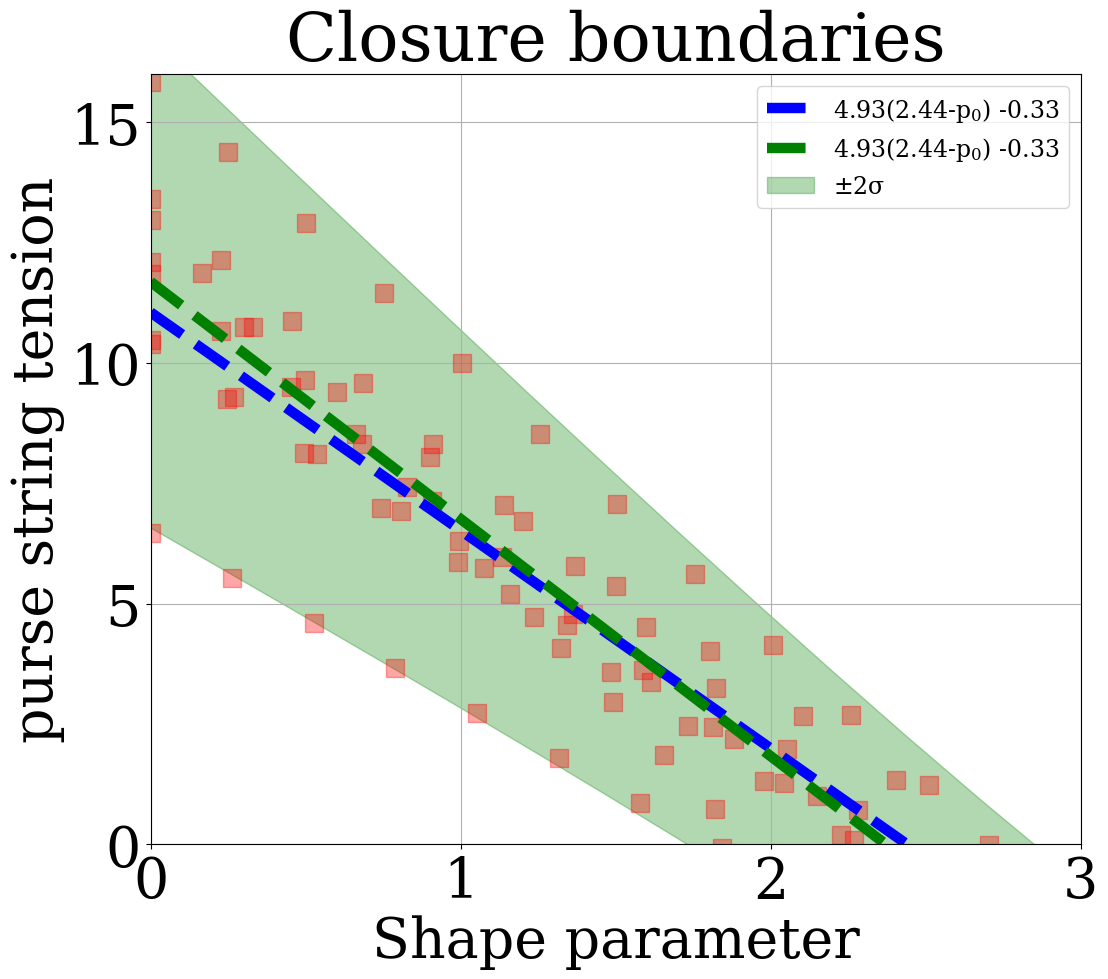

In [137]:
plt.figure(figsize=(12,10))
plt.plot(beta1[0:8,:18].T,np.flip(lambda1[0:8].T)-2.11*beta1[0:8,:18].T,'rs',alpha=0.35,ms=13)

y = meanl
x = -meanb+meanb[len(meanb)//2+1]
reg4 = LinearRegression().fit(x.reshape(-1, 1),y)
# print('coef',reg4.coef_.round(2))
# print('intercept', (reg4.intercept_).round(2))
plt.plot(meanb,4.53*(2.44-meanb),'b--',lw=7.5,label=str(reg4.coef_.round(2)[0])+"("+str((meanb[len(meanb)//2+1]).round(2))+"-$\mathregular{p_0}$) "+str((reg4.intercept_).round(2)))
plt.plot(meanb,meanl,'g--',lw=7.5,label=str(reg4.coef_.round(2)[0])+"("+str((meanb[len(meanb)//2+1]).round(2))+"-$\mathregular{p_0}$) "+str((reg4.intercept_).round(2)))
plt.fill_between(meanb,meanl-2*stdprop,meanl+2*stdprop,color = 'green',alpha=0.3,label = "$\pm \mathregular{2\sigma}$")
plt.xlabel("Shape parameter")
plt.ylabel("purse string tension")
#plt.fill_betweenx(meanl, meanb-2*stdb,meanb+2*stdb,alpha=0.5)
plt.grid(which="both")
plt.ylim(0,16)
plt.xlim(0,3)
plt.title("Closure boundaries")
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=17)
plt.legend(fontsize=17,prop=font,loc = "best")
# plt.savefig("ClosureBoundary.pdf", dpi = 600,bbox_inches='tight')

The boundary changes depending on the tissue considered, factors that impact the change of boundary are the number of sides and the size of the wound (as they determine the scaling of the results)

/tmp/ipykernel_89465/1435014364.py:6: RuntimeWarning: divide by zero encountered in power
  mean_fit = 0.35*meanl2[:]**(-1.05)


coef [-1.05]
intercept 0.35


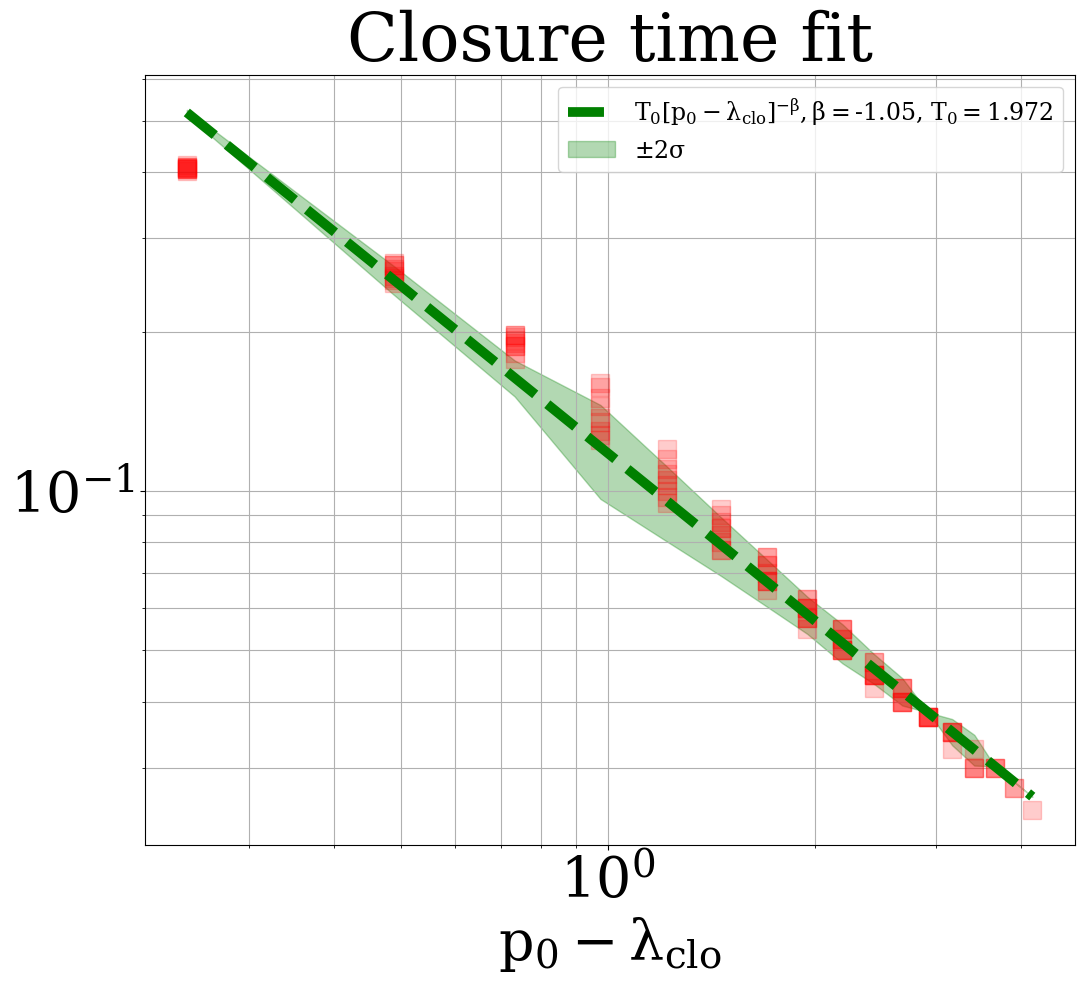

In [140]:
plt.figure(figsize=(12,10))
meanb = np.mean(beta1[0:8,:18],0)
logT = np.log(mean_t2[1:])
logX = np.log(meanl2[1:])
reg4 = LinearRegression().fit(logX.reshape(-1, 1),logT)
mean_fit = 0.35*meanl2[:]**(-1.05)
print('coef',reg4.coef_.round(2))
print('intercept', np.exp(reg4.intercept_).round(2))
plt.plot(meanb,mean_t1.T,'rs',alpha=0.2,ms=13)
#plt.plot(meanb,mean_t2,'b-',label = "Average")
#plt.fill_between(meanb,mean_t2-3*std_t2,mean_t2+3*std_t2,alpha=0.5,label = "$\pm \mathregular{3\sigma}$")
#mean_fit = 1.4*meanb[:]**(-1.05)
plt.plot(meanb[1:],mean_fit[1:].T,'g--',label = "$\mathregular{T_0[p_0-\lambda_{clo}]^{-\\beta}, \\beta =} $" + str(reg4.coef_.round(2)[0])+", $\mathregular{T_0} = $" + str(np.exp(reg4.intercept_).round(1)*4.93),lw=7)
plt.fill_between(meanb[:],mean_fit-2*std_t2,mean_fit+2*std_t2,color = "green",alpha=0.3,label = "$\pm \mathregular{2\sigma}$")
plt.xlabel("$\mathregular{p_0-\lambda_{clo}}$")
#plt.ylabel("Closure time")
plt.legend(fontsize=13,prop=font,loc = "best")
plt.yscale('log')
plt.xscale('log')

plt.title("Closure time fit")
plt.grid(which = 'both')
# plt.savefig("ClosureTime.pdf", dpi = 600,bbox_inches='tight')

In [131]:
np.exp(reg4.intercept_)

0.05504138411921004

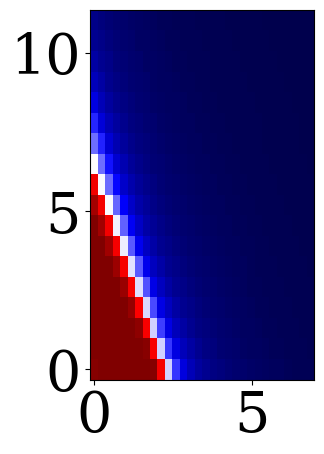

In [274]:
plt.pcolormesh(beta2, lambda2,avg_t.T,cmap='seismic')
plt.gca().set_aspect('equal')

/tmp/ipykernel_10568/3712986644.py:18: RuntimeWarning: invalid value encountered in power
  thr = 2/3*(a/225-b)**(3/2)*(3.768**2/(3*a/225))**(1/2)
/tmp/ipykernel_10568/3712986644.py:36: RuntimeWarning: divide by zero encountered in power
  mean_fit = 0.35*meanl2[:]**(-1.05)


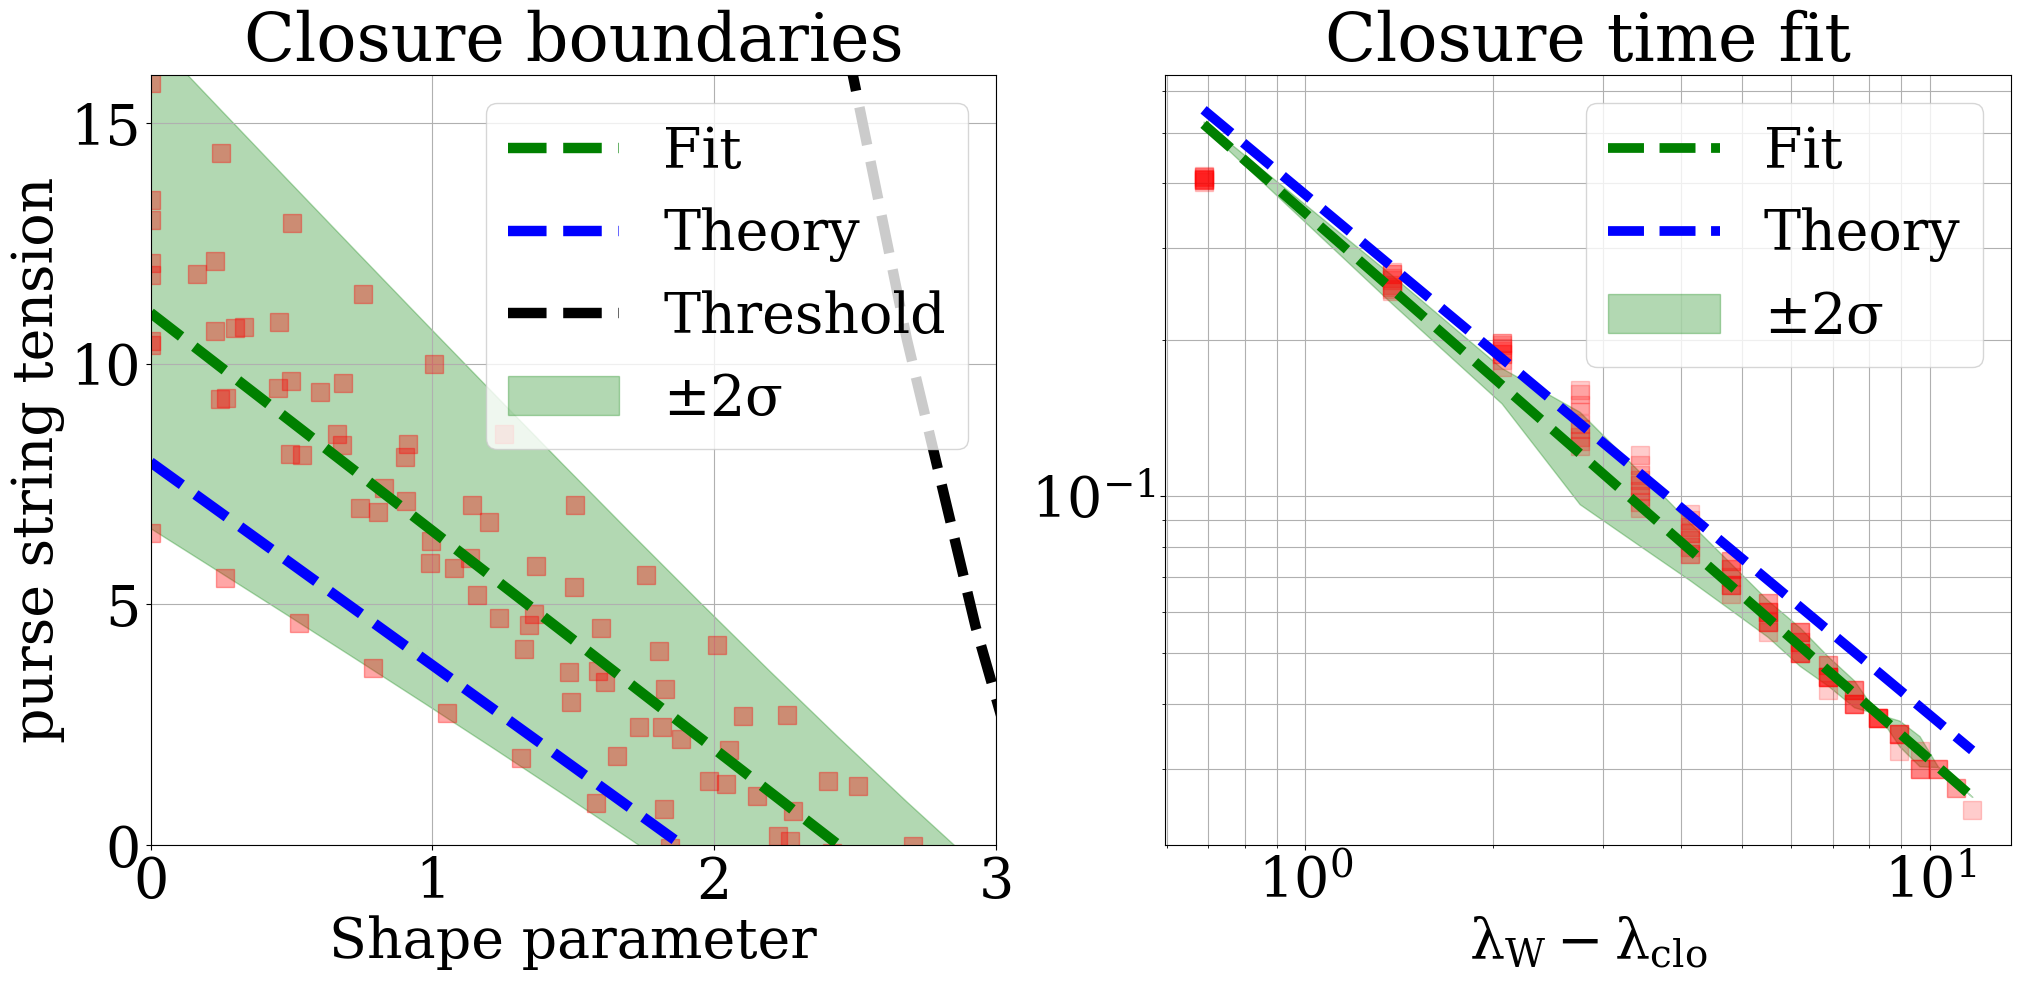

In [82]:
plt.figure(figsize=(24,10))
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=40)


plt.subplot(121)


y = meanl
x = -meanb+meanb[len(meanb)//2+1]
reg4 = LinearRegression().fit(x.reshape(-1, 1),y)

plt.plot(beta1[0:8].T,np.flip(lambda1[0:8].T)-2.11*beta1[0:8].T,'rs',alpha=0.35,ms=13)
plt.plot(meanb,4.53*(2.44-meanb),'g--',lw=7.5,label='Fit')
plt.plot(meanb,4.22*(1.884-meanb),'b--',lw=7.5,label='Theory')
a = 2/3.768**2 + meanb/(2*3.768)
b = 2.25*(meanb/3.768-1)
thr = 2/3*(a/225-b)**(3/2)*(3.768**2/(3*a/225))**(1/2)
plt.plot(meanb,thr-2.11*meanb,'k--',lw=7.5,label='Threshold')
plt.fill_between(meanb,meanl-2*stdprop,meanl+2*stdprop,color = 'green',alpha=0.3,label = "$\pm \mathregular{2\sigma}$")
plt.xlabel("Shape parameter")
plt.ylabel("purse string tension")
plt.grid(which="both")
plt.ylim(0,16)
plt.xlim(0,3)
plt.legend(prop=font,loc = "best")
plt.title("Closure boundaries")


plt.subplot(122)

meanb = np.mean(beta1[0:8],0)
logT = np.log(mean_t2[1:])
logX = np.log(meanl2[1:])
reg4 = LinearRegression().fit(logX.reshape(-1, 1),logT)
mean_fit = 0.35*meanl2[:]**(-1.05)

plt.plot(meanl2,mean_t1.T,'rs',alpha=0.2,ms=13)
plt.plot(meanl2[1:],mean_fit[1:],'g--',label = 'Fit',lw=7)
n = 4
Extrafactor = 1/(4*np.pi*np.pi)*n

plt.plot(meanl2[1:],-Extrafactor*1/2.11*1.88/(meanb[1:]-1.88)*(4.21*(1.88-meanb[1:]))/meanl2[1:],'b--',label = 'Theory',lw=7)
plt.fill_between(meanl2[:],mean_fit-2*std_t2,mean_fit+2*std_t2,color = "green",alpha=0.3,label = "$\pm \mathregular{2\sigma}$")
plt.xlabel("$\mathregular{\lambda_W-\lambda_{clo}}$")
plt.legend(prop=font,loc = "best")
plt.yscale('log')
plt.xscale('log')

plt.title("Closure time fit")
plt.grid(which = 'both')

plt.savefig("ClosurePython.pdf", dpi = 600,bbox_inches='tight')

In [60]:
(-a+b)

array([2.98333716, 2.95096737, 2.91859758, 2.88622779, 2.853858  ,
       2.82148821, 2.78911842, 2.75674862, 2.72437883, 2.69200904,
       2.65963925, 2.62726946, 2.59489967, 2.56252987, 2.53016008,
       2.49779029, 2.4654205 , 2.43305071])

4.93(2.44-${p_0}$) -0.33
${T_0[p_0-\lambda_{clo}]^{-\beta}, \beta =}$-1.05, $T_0 = 233.6327$

In [597]:
with open("ClosureEquationsFit.txt",'w') as text:
    y = meanl
    x = -meanb+meanb[len(meanb)//2+1]
    reg4 = LinearRegression().fit(x.reshape(-1, 1),y)
    text.write(str(reg4.coef_.round(2)[0])+"("+str((meanb[len(meanb)//2+1]).round(2))+"-$\mathregular{p_0}$) "+str((reg4.intercept_).round(2))+'\n')
    logT = np.log(mean_t2[1:])
    logX = np.log(meanl2[1:])#np.log(np.arange(1,len(mean_t2[1:])+1))*(1)
    reg4 = LinearRegression().fit(logX.reshape(-1, 1),logT)
    text.write("$\mathregular{T_0[p_0-\lambda_{clo}]^{-\\beta}, \\beta =} $" + str(reg4.coef_.round(2)[0])+", $\mathregular{T_0} = $" + str(np.exp(reg4.intercept_).round(2)*4.93))

In [577]:
a = np.array([[0],[1]])
b = np.array([[1],[0]])

R = 2/np.sqrt(5)*np.array([[-1/2,1],[1,1/2]])

np.arccos((R.dot(a).T).dot(a))

array([[1.10714872]])

In [574]:
R

array([[-0.4472136 ,  0.89442719],
       [ 0.89442719,  0.4472136 ]])

In [599]:
np.exp(reg4.intercept_).round(2)

140.34

array([2.75728884, 2.242471  , 1.97633539, 1.80644692, 1.68714587,
       1.59889898, 1.53169636, 1.47981988, 1.43977351, 1.40933818,
       1.38709804, 1.37219115, 1.36418133, 1.36300666, 1.36899017,
       1.38292053, 1.40623905])

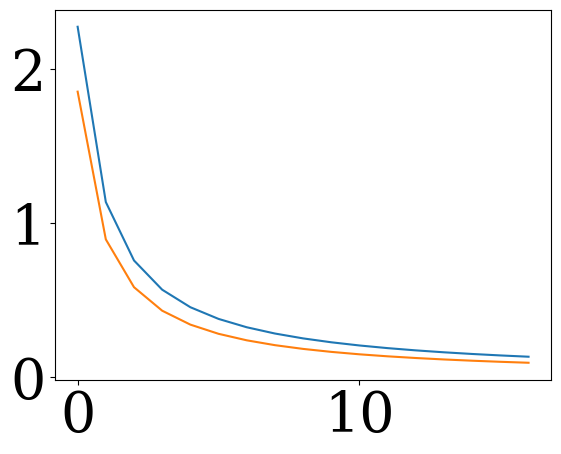

In [110]:
plt.plot(-1/(2.4*2.11)*1.88/(meanb[1:]-1.88)*(4.21*(1.88-meanb[1:]))/meanl2[1:])
plt.plot(1.25*meanl2[1:]**(-1.05))

In [65]:
x = np.arange(0,len(meanb))/len(meanb)
y = np.arange(0,len(meanl))/len(meanl)

regx = LinearRegression().fit(x.reshape(-1, 1),meanb)
regy = LinearRegression().fit(y.reshape(-1, 1),meanl)

In [66]:
print(regx.coef_)
print(regy.coef_)

print(regx.intercept_)
print(regy.intercept_)

[4.39089749]
[-21.64075984]
8.881784197001252e-16
11.688412469027742


In [67]:
x100 = np.arange(0,100)/100
y100 = np.arange(0,100)/100

b100 = regx.coef_*x100 + regx.intercept_
l100 = regy.coef_*x100 + regy.intercept_

/tmp/ipykernel_10568/502051023.py:7: RuntimeWarning: invalid value encountered in power
  y2_fit = 2/3*((alphafit/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit))-2.11*x1_fit
/tmp/ipykernel_10568/502051023.py:61: RuntimeWarning: divide by zero encountered in power
  mean_fit = 0.35*meanl2[:]**(-1.05)
/tmp/ipykernel_10568/502051023.py:65: RuntimeWarning: invalid value encountered in power
  y2_fit = 2/3*((alphafit/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit))-2.11*meanb
/tmp/ipykernel_10568/502051023.py:68: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(B,L,np.log10((Z1)),cmap='Blues')


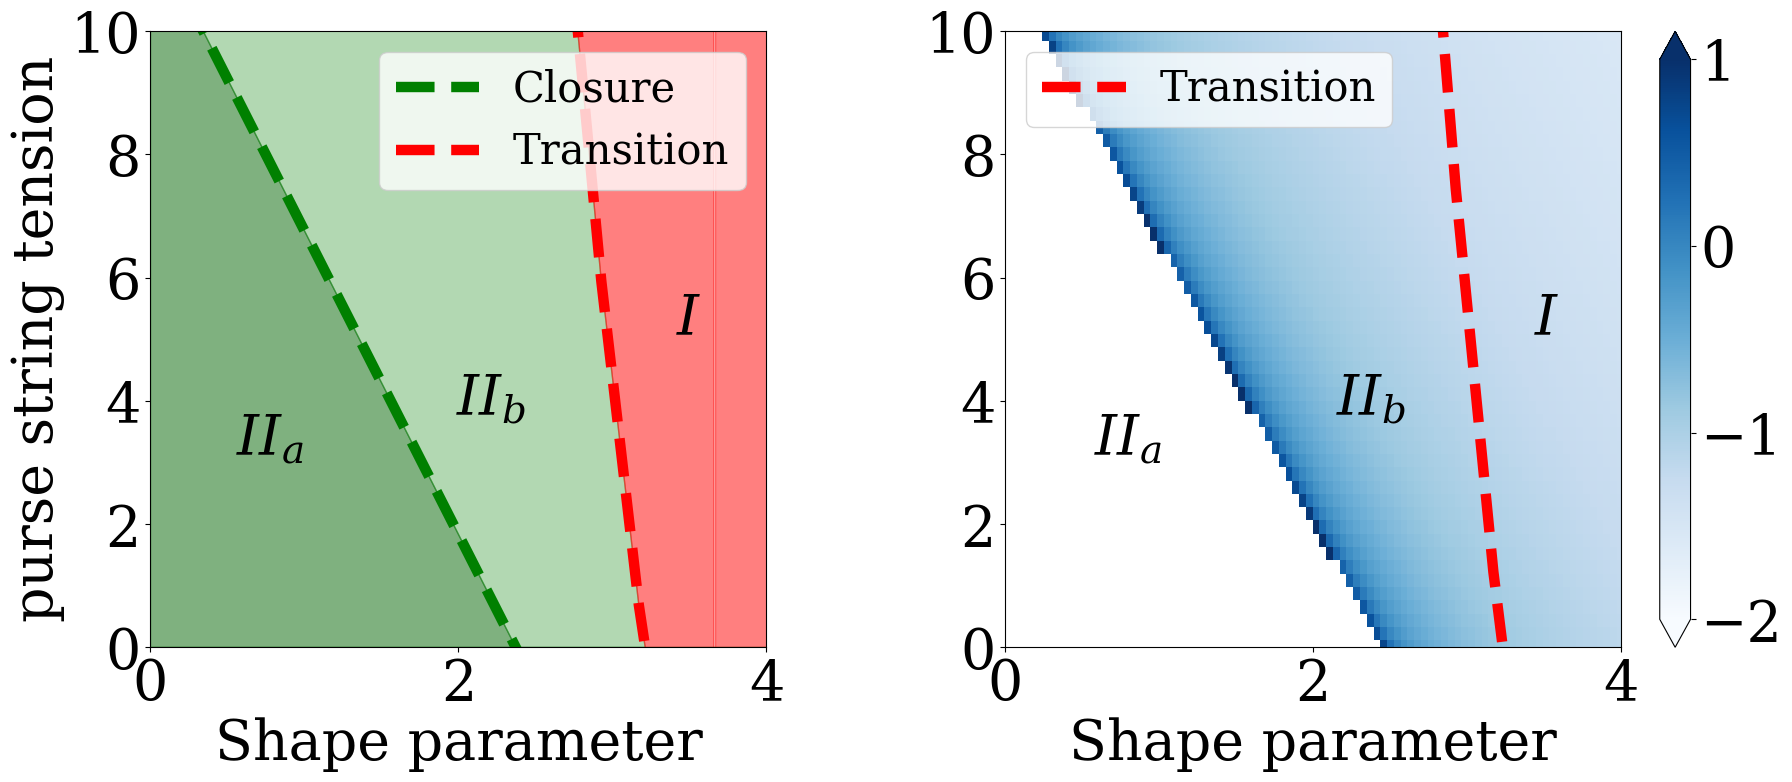

In [85]:
plt.figure(figsize=(22,8))
font = font_manager.FontProperties(family='serif',
                                   style='normal', size=30)

betafit = 2.11/3.768*(meanb-3.768)
alphafit = (2/(3.768)**2 + 2.11/2*meanb/3.768)
y2_fit = 2/3*((alphafit/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit))-2.11*x1_fit

plt.subplot(121)


y = meanl
x = -meanb+meanb[len(meanb)//2+1]
reg4 = LinearRegression().fit(x.reshape(-1, 1),y)

plt.plot(meanb,meanl,'g--',lw=7.5,label='Closure')
plt.plot(meanb,y2_fit,'r--',lw=7.5,label='Transition')
#plt.plot(meanb,4.22*(1.884-meanb),'b--',lw=7.5,label='Theory')
plt.fill_between(meanb,0,meanl,color = 'darkgreen',alpha=0.5)
plt.fill_between(meanb,meanl,y2_fit,color = 'green',alpha=0.3)
plt.fill_between(meanb,y2_fit,1000,color = 'red',alpha=0.5)
plt.fill_betweenx(y2_fit, 3.665,5,color = 'red',alpha=0.5)
plt.xlabel("Shape parameter")
plt.ylabel("purse string tension")
plt.grid(False)
plt.ylim(0,10)
plt.xlim(0,4)
plt.legend(prop=font,loc = "best")
plt.gca().set_aspect(0.4)
#plt.title("Closure boundaries")

plt.figtext(0.3,0.4,"$\mathregular{II_b}$",fontstyle = "italic",color = "black")
plt.figtext(0.2,0.35,"$\mathregular{II_a}$",fontstyle = "italic",color = "black")
plt.figtext(0.4,0.50,"$\mathregular{I}$",fontstyle = "italic",color = "black")



plt.subplot(122)

B,L = np.meshgrid(b100,l100)

#Z = np.log(2)/2*1.9/np.abs((L-4.22*(-B+1.88)))

gamma1 = 2.27
pc = 4.88
pw0 = 3.768 
corrfact = 1

#Beta = gamma1*(B/pc-1)
#LambdaW = L + gamma1*B
#logterm = LambdaW/(Beta*pw0 + LambdaW)
#abszeroterm = logterm>0
#taufree = 1/(Beta)
Z1 = -1/(np.pi**2)*1/2.27*2.44/(B-2.44)*(4.53*(2.44-B))/(L-4.53*(2.44-B))
Z1 = Z1*(Z1>0)

meanb = np.mean(beta1[0:8],0)
logT = np.log(mean_t2[1:])
logX = np.log(meanl2[1:])
reg4 = LinearRegression().fit(logX.reshape(-1, 1),logT)
mean_fit = 0.35*meanl2[:]**(-1.05)

betafit = gamma1/3.768*(meanb-pw0)
alphafit = (2/(pw0)**2 + gamma1/2*meanb/pw0)
y2_fit = 2/3*((alphafit/225-betafit)**(3/2)) * np.sqrt(225*(3.768)**2/(alphafit))-2.11*meanb

#plt.plot(meanl2,mean_t1.T,'rs',alpha=0.2,ms=13)
plt.pcolormesh(B,L,np.log10((Z1)),cmap='Blues')
plt.colorbar(extend='both',ticks = [1,0,-1,-2])
#plt.plot(meanb,meanl,'g--',lw=7.5,label='Closure',alpha=0)
plt.plot(meanb,y2_fit,'r--',lw=7.5,label='Transition')
plt.clim(-2,1)
#plt.fill_between(meanl2[:],mean_fit-2*std_t2,mean_fit+2*std_t2,color = "green",alpha=0.3,label = "$\pm \mathregular{2\sigma}$")
plt.xlabel("Shape parameter")

plt.legend(prop=font,loc = "best")
plt.ylim(0,10)
plt.xlim(0,4)
#plt.yticks([])

#plt.title("Closure time (log$_{10}$)")
#plt.grid(which = 'both')
plt.gca().set_aspect(0.4)
plt.figtext(0.70,0.4,"$\mathregular{II_b}$",fontstyle = "italic",color = "black")
plt.figtext(0.59,0.35,"$\mathregular{II_a}$",fontstyle = "italic",color = "black")
plt.figtext(0.79,0.50,"$\mathregular{I}$",fontstyle = "italic",color = "black")


plt.savefig("AnalyticalPython.pdf", dpi = 600,bbox_inches='tight')
